In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sn

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("D:/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [4]:
# 결측치 처리
fill_mean_cols = ['Hemoglobin', 'Age', 'BMI', 'Physical_activity', 'Alcohol_consumption', 'Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']
fill_zero_cols = ['Pregnant', 'Smoking', 'Chronic_kidney_disease', 'Pregnancy']

for col in fill_mean_cols:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

for col in fill_zero_cols:
    if col in df.columns:
        df[col].fillna(0, inplace=True)

# 최종 결측치 확인
print("결측치 여부:\n", df.isnull().sum())

결측치 여부:
 Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


In [5]:
# imbalanced 확인
df['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [6]:
# 데이터 분할 X
X=df.drop('Blood_Pressure_Abnormality',axis=1)
X.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0


In [7]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# 데이터 분할 y
y=df['Blood_Pressure_Abnormality']
y.value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [9]:
# 원 핫 인코딩
#Y = pd.get_dummies(y).values
#Y

# 정수 인코딩 (원-핫 말고)
Y = y.values  # 0 또는 1의 정수값을 그대로 유지

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1600, 14), (400, 14), (1600,), (400,))

In [12]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [13]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [15]:
# 간단한 분류 모델 정의
class BPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # <--- 출력 뉴런 수를 1로!

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # <--- 여기서는 sigmoid 적용 X
        return x

# 모델 초기화
model = BPClassifier(X_train.shape[1])

In [16]:
# 손실 함수와 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss()를 쓰면 sigmoid+binary cross entropy를 한번에 처리한다.
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
# 모델 학습
train_losses = []
test_accuracies = []

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        labels = labels.unsqueeze(1) 

        optimizer.zero_grad()
        outputs = model(inputs)  # (batch_size, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            labels = labels.unsqueeze(1)
            outputs = model(inputs)
            preds = torch.sigmoid(outputs) > 0.5  # <--- sigmoid + 0.5 기준으로 분류
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")


print("Training complete.")

Epoch 1/30, Loss: 0.6586, Accuracy: 73.50%
Epoch 2/30, Loss: 0.5662, Accuracy: 74.75%
Epoch 3/30, Loss: 0.5142, Accuracy: 75.75%
Epoch 4/30, Loss: 0.4902, Accuracy: 76.75%
Epoch 5/30, Loss: 0.4648, Accuracy: 78.50%
Epoch 6/30, Loss: 0.4340, Accuracy: 80.25%
Epoch 7/30, Loss: 0.4038, Accuracy: 83.50%
Epoch 8/30, Loss: 0.3702, Accuracy: 85.50%
Epoch 9/30, Loss: 0.3414, Accuracy: 87.50%
Epoch 10/30, Loss: 0.3179, Accuracy: 88.25%
Epoch 11/30, Loss: 0.3019, Accuracy: 88.75%
Epoch 12/30, Loss: 0.2911, Accuracy: 89.00%
Epoch 13/30, Loss: 0.2835, Accuracy: 89.00%
Epoch 14/30, Loss: 0.2758, Accuracy: 88.00%
Epoch 15/30, Loss: 0.2710, Accuracy: 89.75%
Epoch 16/30, Loss: 0.2676, Accuracy: 88.50%
Epoch 17/30, Loss: 0.2627, Accuracy: 88.50%
Epoch 18/30, Loss: 0.2580, Accuracy: 88.25%
Epoch 19/30, Loss: 0.2550, Accuracy: 88.50%
Epoch 20/30, Loss: 0.2502, Accuracy: 89.25%
Epoch 21/30, Loss: 0.2447, Accuracy: 88.75%
Epoch 22/30, Loss: 0.2451, Accuracy: 88.00%
Epoch 23/30, Loss: 0.2384, Accuracy: 88.2

In [18]:
# 모델 평가
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[183  25]
 [ 22 170]]
F1 Score: 0.88
Precision: 0.88
Recall: 0.88
Specificity: 0.88


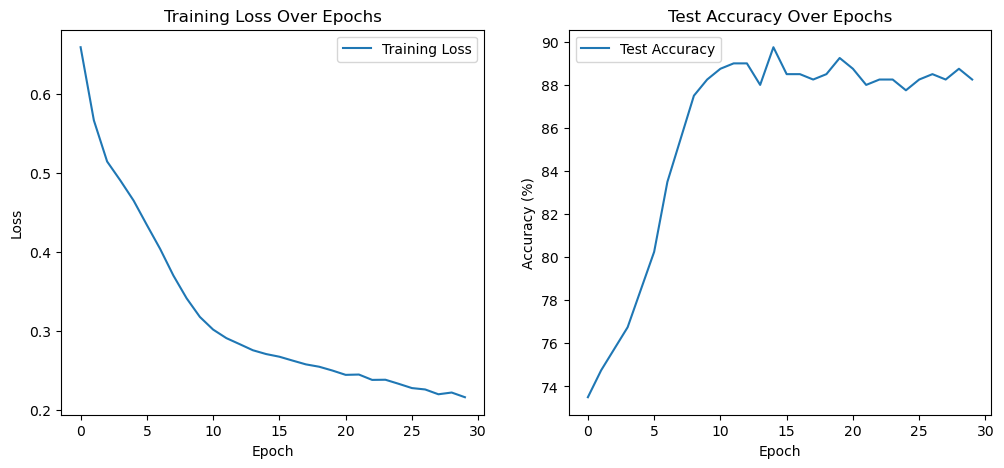

In [20]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

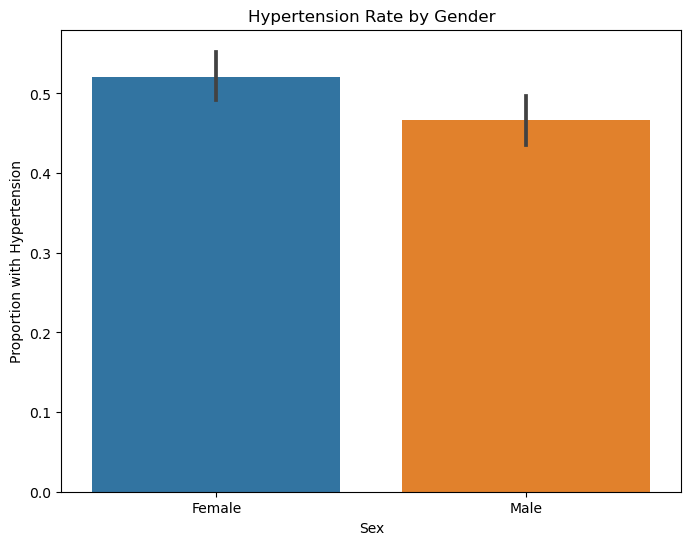

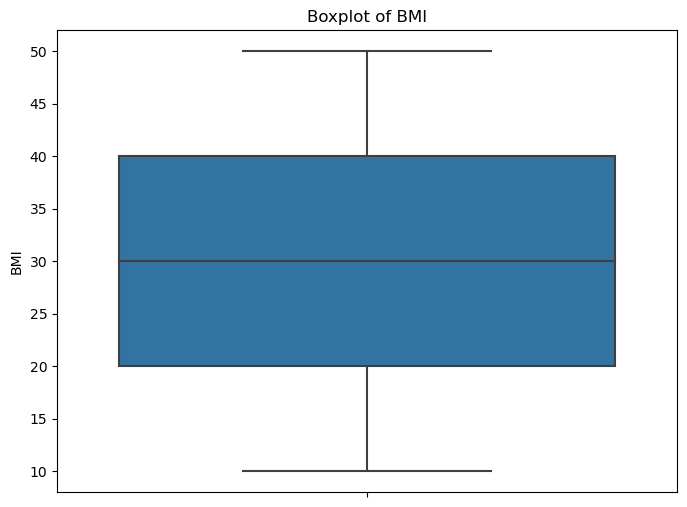

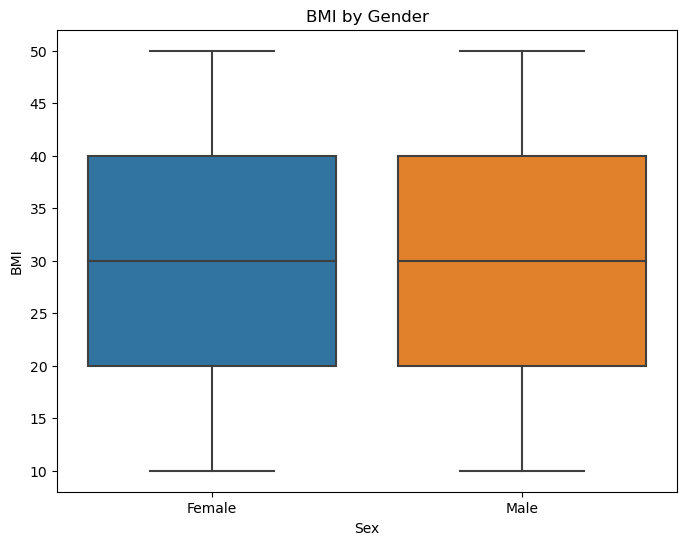

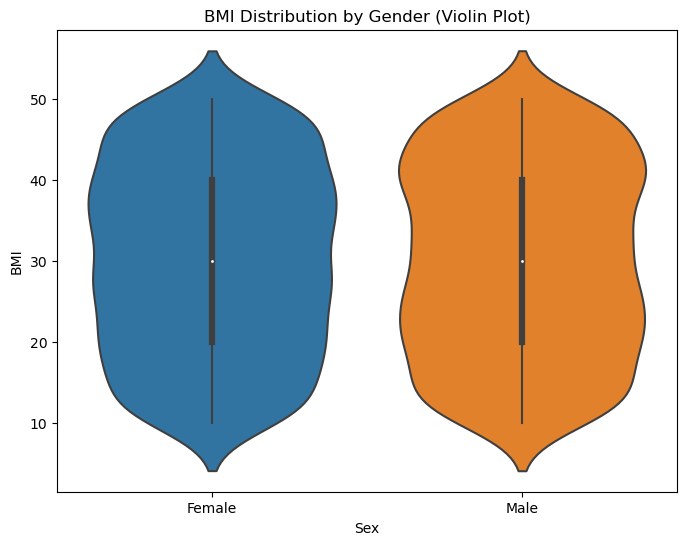

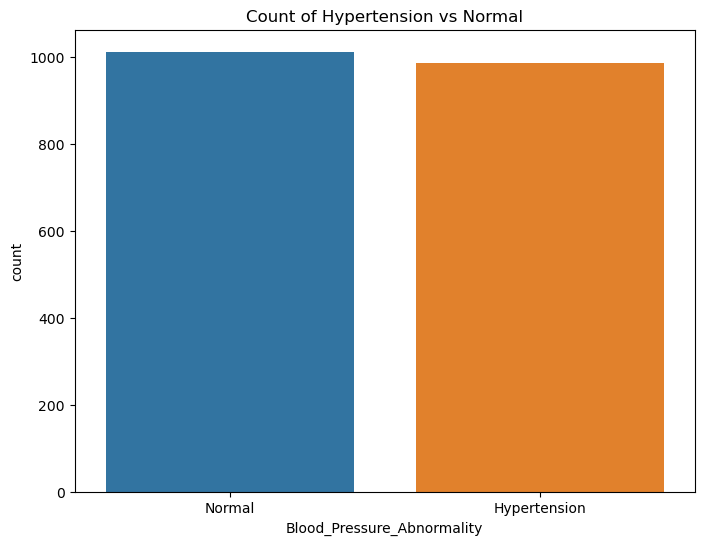

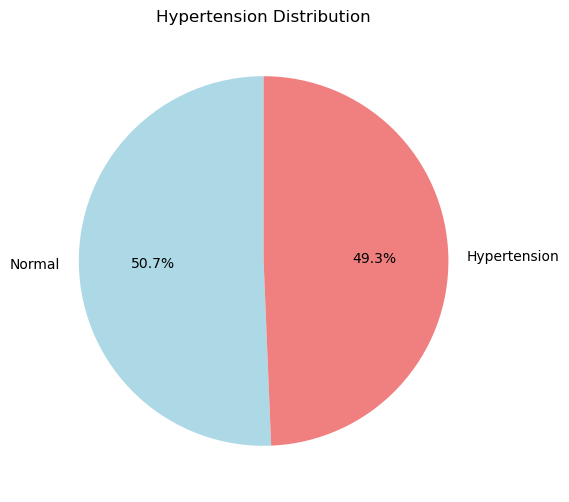

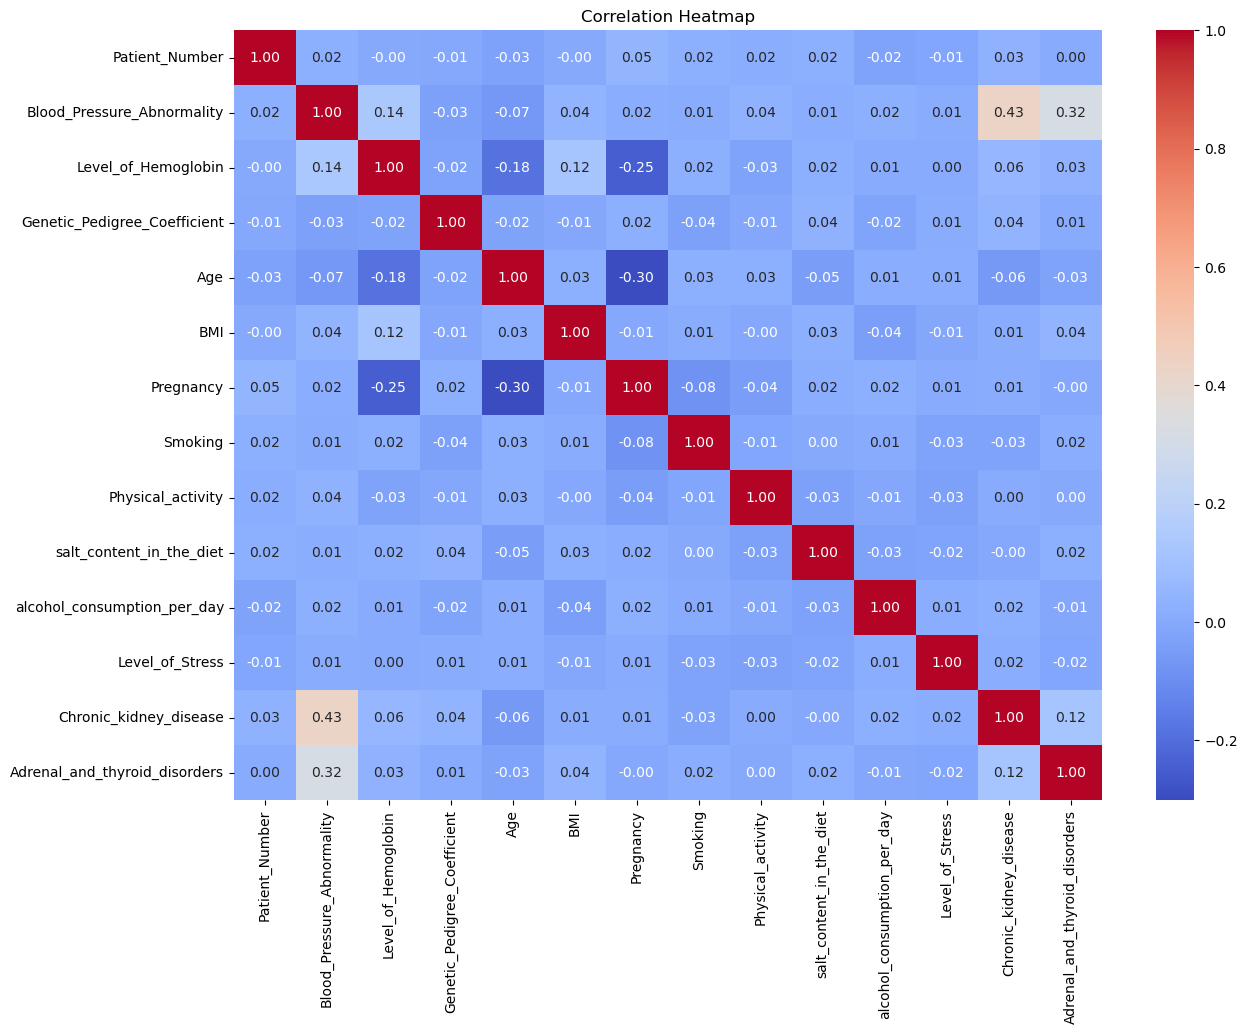

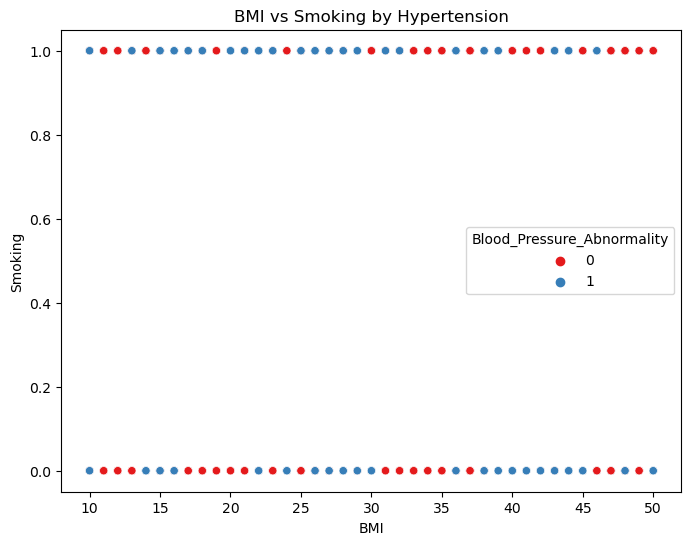

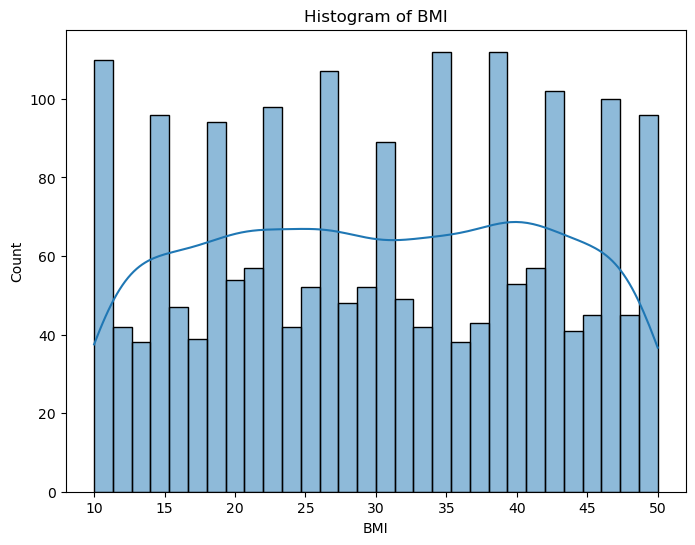

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("D:/BP_data.csv")

# 결측치 처리
fill_mean_cols = ['Level_of_Hemoglobin', 'Age', 'BMI', 'Physical_activity', 'alcohol_consumption_per_day']
fill_zero_cols = ['Pregnancy', 'Smoking', 'Chronic_kidney_disease']

for col in fill_mean_cols:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

for col in fill_zero_cols:
    if col in df.columns:
        df[col].fillna(0, inplace=True)

# Sex 컬럼: 0 = Male, 1 = Female로 변환
df['Sex'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# barplot: 성별에 따른 고혈압 비율
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Blood_Pressure_Abnormality', data=df)
plt.title('Hypertension Rate by Gender')
plt.ylabel('Proportion with Hypertension')
plt.show()

# boxplot: BMI 분포
plt.figure(figsize=(8,6))
sns.boxplot(y=df['BMI'])
plt.title('Boxplot of BMI')
plt.show()

# boxplot: 성별별로 BMI 비교
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='BMI', data=df)
plt.title('BMI by Gender')
plt.show()

# violinplot: 성별별 BMI 분포
plt.figure(figsize=(8,6))
sns.violinplot(x='Sex', y='BMI', data=df)
plt.title('BMI Distribution by Gender (Violin Plot)')
plt.show()

# countplot: 고혈압 유무 인원 수
plt.figure(figsize=(8,6))
sns.countplot(x='Blood_Pressure_Abnormality', data=df)
plt.title('Count of Hypertension vs Normal')
plt.xticks([0,1], ['Normal', 'Hypertension'])
plt.show()

# pie chart: 고혈압 유무 비율
labels = ['Normal', 'Hypertension']
sizes = df['Blood_Pressure_Abnormality'].value_counts()
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Hypertension Distribution')
plt.show()

# heatmap: 상관관계 히트맵
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# scatterplot: BMI와 Smoking에 따라 고혈압 여부 구분
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Smoking', hue='Blood_Pressure_Abnormality', data=df, palette='Set1')
plt.title('BMI vs Smoking by Hypertension')
plt.xlabel('BMI')
plt.ylabel('Smoking')
plt.show()

# 특정 컬럼의 히스토그램 (예: BMI)
plt.figure(figsize=(8,6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
